In [1]:
!pip install pycountry
!pip install pycountry-convert

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [39]:
#This code takes in the raw Gini data, and adds Continent labels for it.
#Input: gini.csv
#Output: giniRegions.csv
import pandas as pd
import pycountry_convert as pc
import logging

# Configure the logger
logging.basicConfig(filename='error_log.log',  # Log file location
                    level=logging.ERROR,      # Log level (we're logging errors here)
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Load data
df = pd.read_csv('gini.csv')

# Drop null codes
df = df.dropna(subset=['Code'])

# Convert country name to continents
def country_to_continent(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        
        # Convert alpha-2 code to continent code
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        # Convert continent code to continent name
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        
        return country_continent_name
    except Exception as e:
        # Return None or a placeholder if the conversion fails
        return None

# Apply the function to a new column
df['Continent'] = df['Entity'].apply(country_to_continent)

# Save the updated CSV
df.to_csv('giniRegions.csv', index=False)


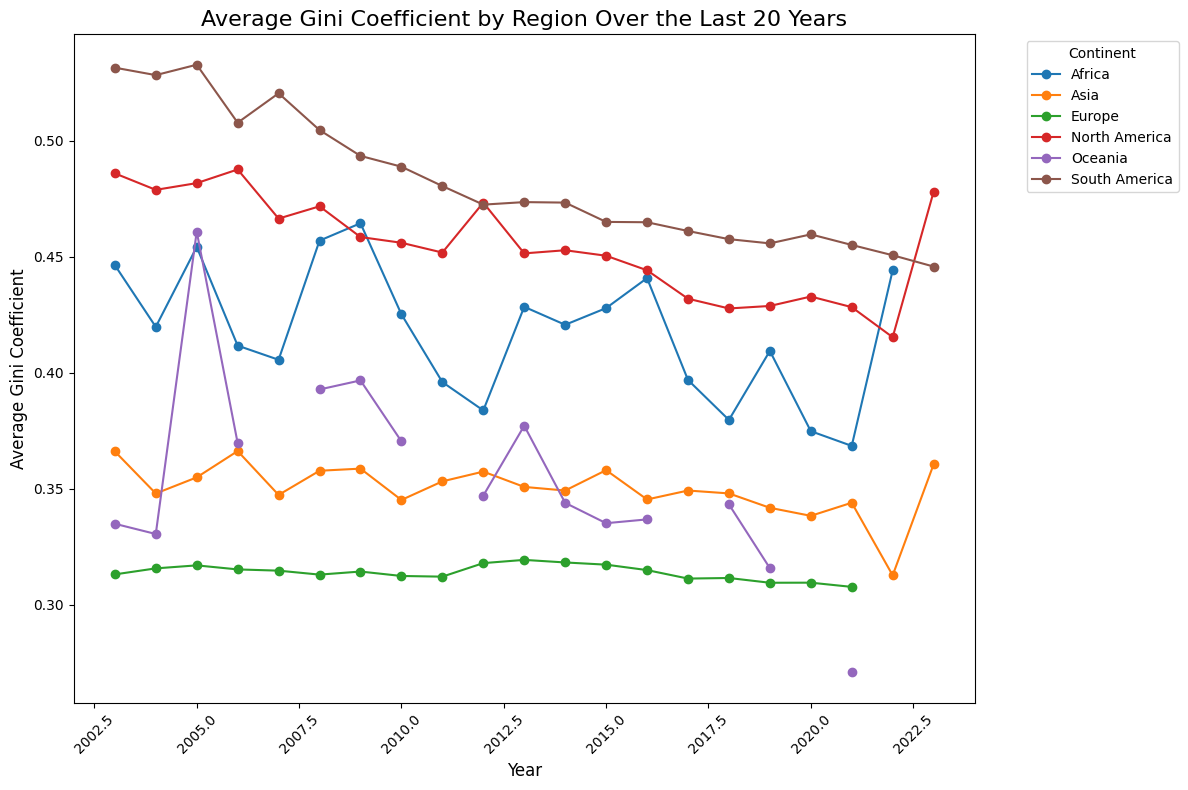

In [3]:
#Plots Average Gini Coefficient by Continent.
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('giniRegions.csv')

# Drop null codes
df = df.dropna(subset=['Code'])

# Get the most recent year in the dataset
most_recent_year = df['Year'].max()

# Filter the data to include only the last 20 years
df_last_20_years = df[df['Year'] >= most_recent_year - 20]

# Group by continent and year, then calculate the average Gini coefficient
continent_year_avg_gini = df_last_20_years.groupby(['Continent', 'Year'])['Gini coefficient'].mean().unstack('Continent')

# Plot the time series for each continent
plt.figure(figsize=(12, 8))

for continent in continent_year_avg_gini.columns:
    plt.plot(continent_year_avg_gini.index, continent_year_avg_gini[continent], label=continent, marker='o')

# Title and labels
plt.title('Average Gini Coefficient by Region Over the Last 20 Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Gini Coefficient', fontsize=12)

# legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
#Adds continent info for GDP PP
#input: gdp.csv
#output: gdpRegions.csv
import pandas as pd
import pycountry_convert as pc
import logging

# Configure the logger
logging.basicConfig(filename='error_log.log',  # Log file location
                    level=logging.ERROR,      # Log level (we're logging errors here)
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Load data
df = pd.read_csv('gdp.csv')

# Drop null codes
df = df.dropna(subset=['Code'])

# Convert country name to continents
def country_to_continent(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        
        # Convert alpha-2 code to continent code
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        # Convert continent code to continent name
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        
        return country_continent_name
    except Exception as e:
        # Return None or a placeholder if the conversion fails
        return None

# Apply the function to a new column
df['Continent'] = df['Entity'].apply(country_to_continent)

# Save the updated CSV
df.to_csv('gdpRegions.csv', index=False)


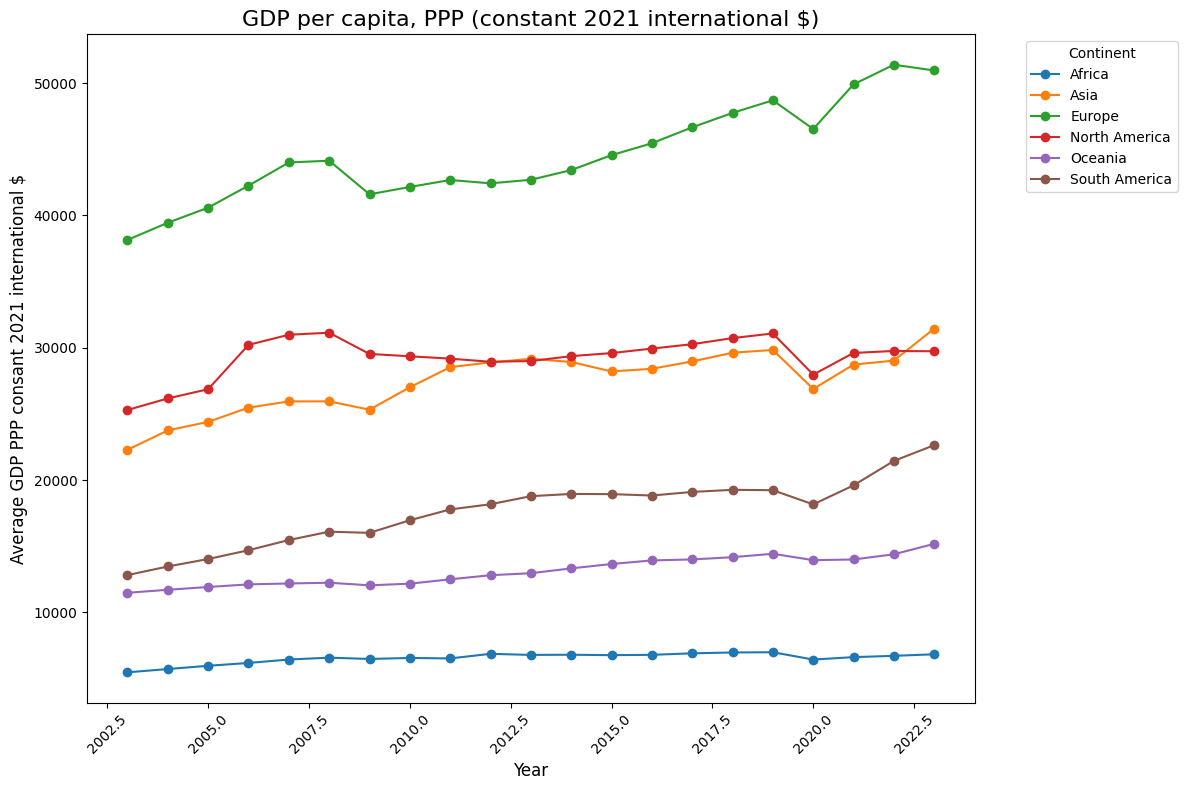

In [5]:
#Plots average GDP PPP by continent over time
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('gdpRegions.csv')

# Drop null codesn
df = df.dropna(subset=['Code'])

# Get the most recent year
most_recent_year = df['Year'].max()

# Filter the data to include only the last 20 years
df_last_20_years = df[df['Year'] >= most_recent_year - 20]

# Group by continent and year, then calculate the average Gini coefficient
continent_year_avg_gini = df_last_20_years.groupby(['Continent', 'Year'])['GDP per capita, PPP (constant 2021 international $)'].mean().unstack('Continent')

# Plot the time series for each continent
plt.figure(figsize=(12, 8))

for continent in continent_year_avg_gini.columns:
    plt.plot(continent_year_avg_gini.index, continent_year_avg_gini[continent], label=continent, marker='o')

# Add title and labels
plt.title('GDP per capita, PPP (constant 2021 international $)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average GDP PPP consant 2021 international $', fontsize=12)

# Add legend
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [6]:
#Adds continent for political systems
#Input: polSystem.csv
#Output: polSystemRegions.csv
import pandas as pd
import pycountry_convert as pc
import logging

# Configure the logger
logging.basicConfig(filename='error_log.log',  # Log file location
                    level=logging.ERROR,      # Log level (we're logging errors here)
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Load data
df = pd.read_csv('polSystem.csv')

# Drop null codes
df = df.dropna(subset=['Code'])

# Convert country name to continents
def country_to_continent(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        
        # Convert alpha-2 code to continent code
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        # Convert continent code to continent name
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        
        return country_continent_name
    except Exception as e:
        # Return None or a placeholder if the conversion fails
        return None

# Apply the function to a new column
df['Continent'] = df['Entity'].apply(country_to_continent)

# Save the updated CSV
df.to_csv('polSystemRegions.csv', index=False)


In [7]:
#Adds continent for trade
#Input: trade.csv
#Output: tradeRegions.csv
import pandas as pd
import pycountry_convert as pc
import logging

# Configure the logger
logging.basicConfig(filename='error_log.log',  # Log file location
                    level=logging.ERROR,      # Log level (we're logging errors here)
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Load data
df = pd.read_csv('trade.csv')

# Drop null codes
df = df.dropna(subset=['Code'])

# Convert country name to continents
def country_to_continent(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        
        # Convert alpha-2 code to continent code
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        # Convert continent code to continent name
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        
        return country_continent_name
    except Exception as e:
        # Return None or a placeholder if the conversion fails
        return None

# Apply the function to a new column
df['Continent'] = df['Entity'].apply(country_to_continent)

# Save the updated CSV
df.to_csv('tradeRegions.csv', index=False)


In [8]:
#Add country codes for energy (so we can filter out continent data)
#Input: energy.csv
#Ouptut: energy.csv

import pandas as pd
import pycountry_convert as pc
import logging

# Configure the logger
logging.basicConfig(filename='error_log.log',  # Log file location
                    level=logging.ERROR,      # Log level (we're logging errors here)
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Load data
df = pd.read_csv('energy.csv')

# Convert country name to code
def country_to_code(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha3 = pc.country_name_to_country_alpha3(country_name)
        
        return country_alpha3
    except Exception as e:
        # Return None or a placeholder if the conversion fails
        return None

# Apply the function to a new column
df['Code'] = df['Entity'].apply(country_to_code)

# Save the updated CSV
df.to_csv('energy.csv', index=False)



In [9]:
#Adds continent for energy
#Input: energy.csv
#Output: energyRegions.csv
import pandas as pd
import pycountry_convert as pc
import logging

# Configure the logger
logging.basicConfig(filename='error_log.log',  # Log file location
                    level=logging.ERROR,      # Log level (we're logging errors here)
                    format='%(asctime)s - %(levelname)s - %(message)s')  # Log format

# Load data
df = pd.read_csv('energy.csv')

# Drop null codes
df = df.dropna(subset=['Code'])

# Convert country name to continents
def country_to_continent(country_name):
    try:
        # Convert country name to alpha-2 code
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        
        # Convert alpha-2 code to continent code
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        
        # Convert continent code to continent name
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        
        return country_continent_name
    except Exception as e:
        # Return None or a placeholder if the conversion fails
        return None

# Apply the function to a new column
df['Continent'] = df['Entity'].apply(country_to_continent)

# Save the updated CSV
df.to_csv('energyRegions.csv', index=False)


In [10]:
#Combine GDP, Gini, Polsystem, trade
#input: gdpRegions.csv, giniRegions.csv, polSystemRegions.csv, tradeRegions.csv, energyRegions.csv
#output: final_unified_data_wide_filtered.csv
import pandas as pd

# Load CSVs
gdpRegions = pd.read_csv('gdpRegions.csv')
giniRegions = pd.read_csv('giniRegions.csv')
polSystemRegions = pd.read_csv('polSystemRegions.csv')
tradeRegions = pd.read_csv('tradeRegions.csv')
energyRegions = pd.read_csv('energyRegions.csv')

# Create copies
gdp_copy = gdpRegions.copy()
gini_copy = giniRegions.copy()
polSystem_copy = polSystemRegions.copy()
trade_copy = tradeRegions.copy()
energy_copy = energyRegions.copy()

# Rename columns to standard names
gdp_copy.rename(columns={'gdp': 'GDP per capita, PPP (constant 2021 international $)'}, inplace=True)
gini_copy.rename(columns={'gini': 'Gini coefficient'}, inplace=True)
polSystem_copy.rename(columns={'regime': 'Political regime'}, inplace=True)
trade_copy.rename(columns={'trade': 'Trade (% of GDP)'}, inplace=True)
#energy ok to not rename

# Drop 'Continent' and annotation column from all but one
for df in [gini_copy, polSystem_copy, trade_copy, energy_copy]:
    df.drop(columns=['Continent'], inplace=True, errors='ignore')

for df in [gdp_copy, gini_copy, polSystem_copy, trade_copy, energy_copy]:
    df.drop(columns=['990179-annotations'], inplace=True, errors='ignore')

# Merge all dataframes on shared keys
merged_df = gdp_copy.merge(gini_copy, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(polSystem_copy, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(trade_copy, on=['Entity', 'Code', 'Year'], how='outer')
merged_df = merged_df.merge(energy_copy, on=['Entity', 'Code', 'Year'], how='outer')

# Keep only rows with complete data for key columns
filtered_df = merged_df.dropna(subset=[
    'Continent',
    'GDP per capita, PPP (constant 2021 international $)',
    'Gini coefficient',
    'Trade (% of GDP)',
    'Primary energy consumption per capita (kWh/person)'
])

# Save to CSV
filtered_df.to_csv('final_unified_data_wide_filtered.csv', index=False)


In [11]:
#Add Gini classifier, drop rows with any NA column
#Input: final_unified_data_wide_filtered.csv
#Output: final_unified_data_wide_filtered.csv
import pandas as pd

# Load the existing filtered data
df = pd.read_csv('final_unified_data_wide_filtered.csv')

# Classify Gini coefficient into Low, Medium, High
def classify_gini(gini):
    if gini < 0.30:
        return 'Low'
    elif gini <= 0.40:
        return 'Medium'
    else:
        return 'High'

df['Gini level'] = df['Gini coefficient'].apply(classify_gini)

# Drop rows with NA values in any column (for countries' data)
df_clean = df.dropna()

# Overwrite the original file with the new column added and cleaned data
df_clean.to_csv('final_unified_data_wide_filtered.csv', index=False)


In [12]:
#Add new coefficient: Reverse Gini multiplied by GDP PPP, higher is better (low Gini, high GDP PPP)
#Input: final_unified_data_wide_filtered.csv
#Output: final_unified_data_wide_filtered.csv
import pandas as pd

# Load dataset
df = pd.read_csv('final_unified_data_wide_filtered.csv')

# Create the new metric: (1 - Gini) * GDP PPP
df['Combined GDP-Gini'] = (1 - df['Gini coefficient']) * df['GDP per capita, PPP (constant 2021 international $)']

# Save the updated DataFrame
df.to_csv('final_unified_data_wide_filtered.csv', index=False)


In [40]:
#Add new classifier label for if Gini is low and GDP PP is high
import pandas as pd

# Load the dataset
df = pd.read_csv('final_unified_data_wide_filtered.csv')

# GDP per capita classifier
def classify_gdp(gdp):
    if gdp < 10000:
        return 'Low'
    elif gdp < 30000:
        return 'Medium'
    else:
        return 'High'

df['GDP PPP level'] = df['GDP per capita, PPP (constant 2021 international $)'].apply(classify_gdp)

# Combined classifier: Gini level is 'Low' and GDP level is 'High'
df['Gini-GDP Flag'] = (df['Gini level'] == 'Low') & (df['GDP PPP level'] == 'High')

# Overwrite the CSV file with updated data
df.to_csv('final_unified_data_wide_filtered.csv', index=False)

In [41]:
#Predict future countries with highest GDP and lowest Gini with polynomial
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('final_unified_data_wide_filtered.csv')

# Drop rows with missing values in key columns
df = df.dropna(subset=[
    'Year',
    'Political regime',
    'Trade (% of GDP)',
    'Primary energy consumption per capita (kWh/person)',
    'Combined GDP-Gini',
    'Entity'
])

# Prepare prediction year
target_year = df['Year'].max() + 20

# Features to use for prediction
features = ['Year', 'Political regime', 'Trade (% of GDP)', 'Primary energy consumption per capita (kWh/person)']

# Where to store the results
predictions = {}

# Loop through each country
for country, group in df.groupby('Entity'):
    if group.shape[0] >= 5:  # Require at least 5 data points
        X = group[features]
        y = group['Combined GDP-Gini']

        # Polynomial features (second degree polynomial)
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_poly = poly.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Predict using average of all features except Year, which is set to target year
        avg_values = group[features[1:]].mean()  # exclude Year for now
        pred_input = pd.DataFrame([[target_year] + avg_values.tolist()], columns=features)

        # Transform and predict
        pred_poly = poly.transform(pred_input)
        y_pred = model.predict(pred_poly)

        predictions[country] = y_pred[0]

# Sort countries by prediction
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Print top 10 predicted winners
print(f"Top 10 predicted countries for Combined GDP-Gini in {target_year}:")
for i, (country, value) in enumerate(sorted_predictions[:10], start=1):
    print(f"{i}. {country}: {value:.2f}")


Top 10 predicted countries for Combined GDP-Gini in 2043:
1. Vietnam: 1998884.27
2. Ireland: 270612.74
3. Denmark: 175715.10
4. Turkey: 157654.48
5. Malta: 153658.76
6. Luxembourg: 137639.86
7. Portugal: 130062.17
8. Germany: 117995.47
9. United Kingdom: 112054.51
10. United States: 101750.14


Score on train: 0.9026730637422893
Score on test: 0.8767123287671232


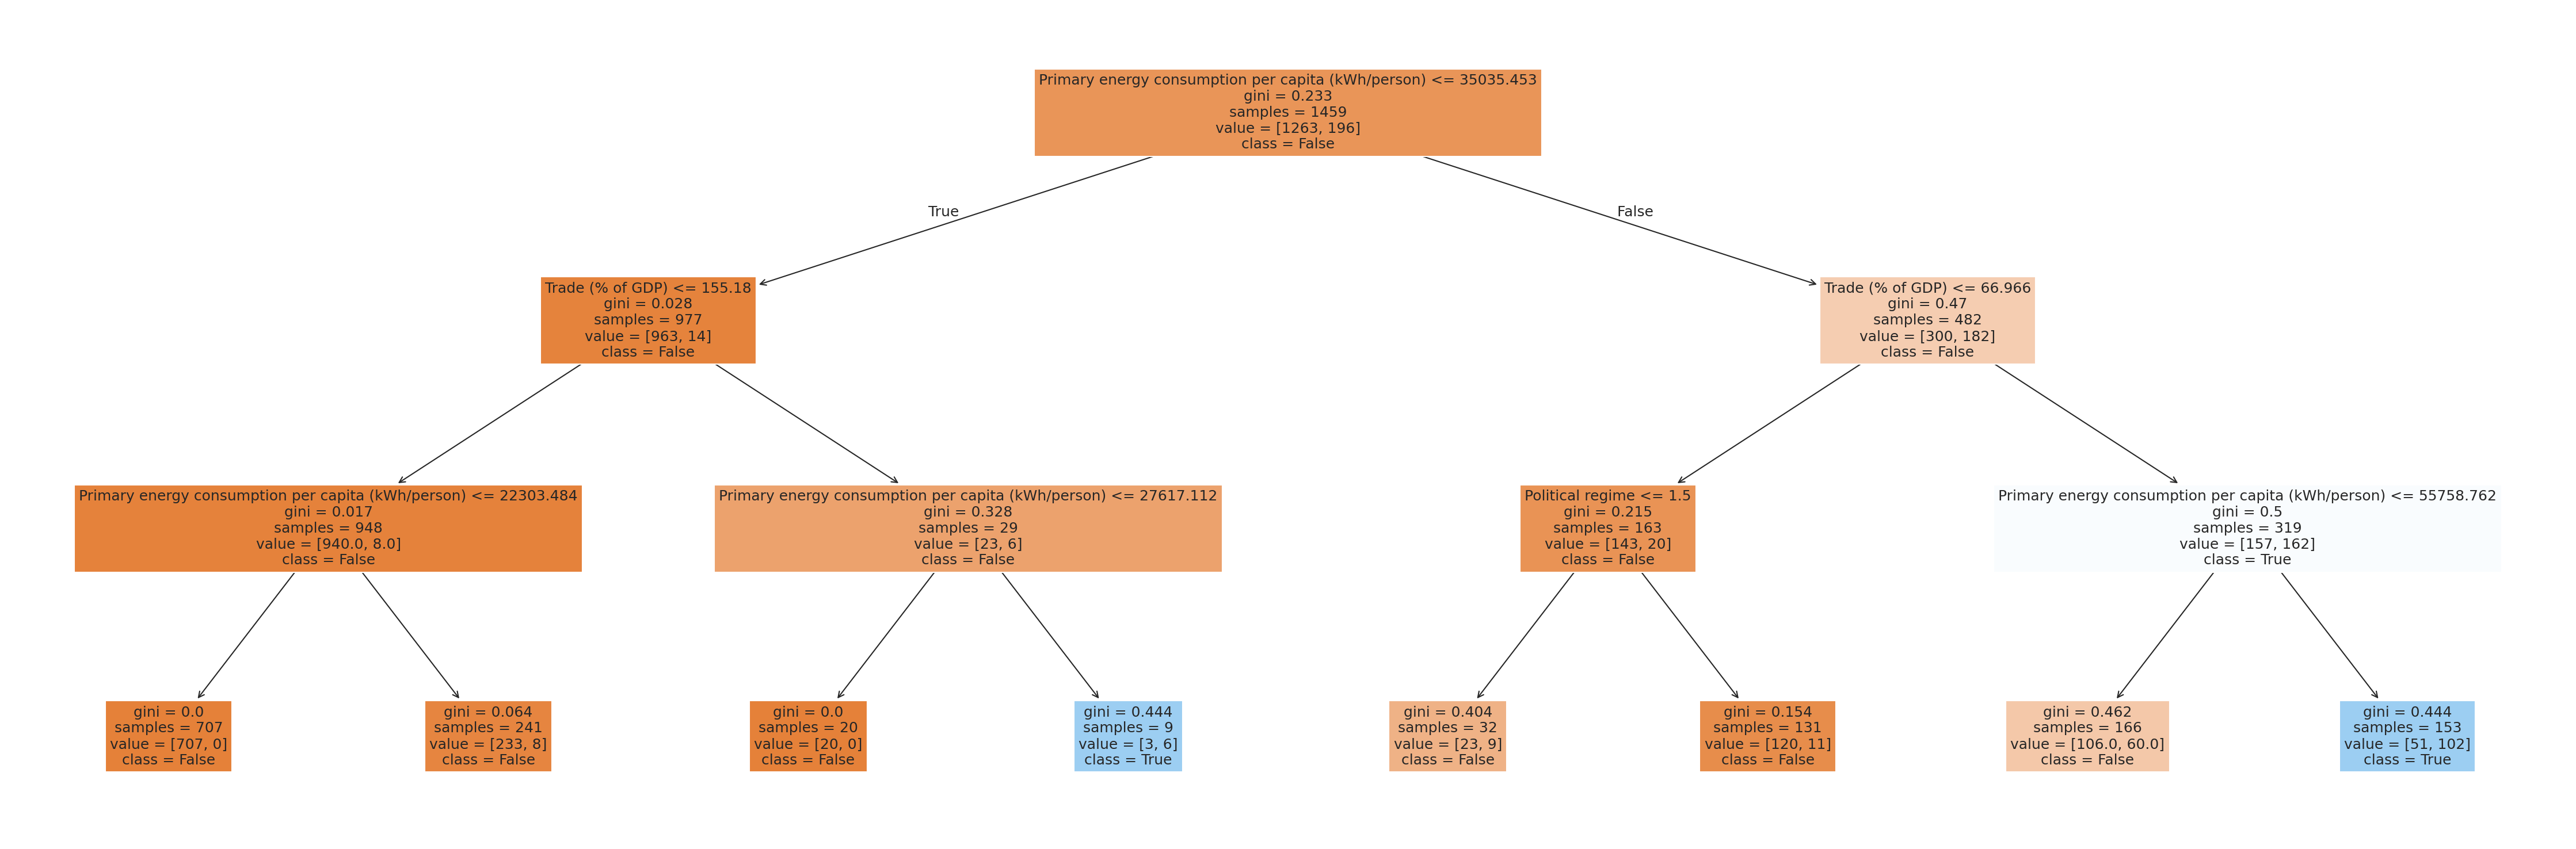

In [42]:
#Decision tree evaluating similar features as above
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
final = pd.read_csv("final_unified_data_wide_filtered.csv")

# Select relevant columns
final_decisionTree = final.filter([
    "Political regime",
    "Trade (% of GDP)",
    "Primary energy consumption per capita (kWh/person)",
    "Gini-GDP Flag"  # Target variable
])

# Train-test split
train = final_decisionTree.sample(frac=0.8, random_state=42)
test = final_decisionTree.drop(index=train.index)

# Define X and y
y_train = train['Gini-GDP Flag']
X_train = train.drop(columns=['Gini-GDP Flag'])

y_test = test['Gini-GDP Flag']
X_test = test.drop(columns=['Gini-GDP Flag'])

# Reduce tree depth to 3
T = DecisionTreeClassifier(max_depth=3, random_state=42)
T.fit(X_train, y_train)

# Evaluation
print('Score on train:', T.score(X_train, y_train))
print('Score on test:', T.score(X_test, y_test))

# Plot the tree with higher DPI and larger size
fig, ax = plt.subplots(figsize=(30, 10), dpi=150)
plot_tree(
    T,
    filled=True,
    feature_names=X_train.columns,
    class_names=[str(c) for c in T.classes_],
    ax=ax,
    fontsize=12
)
plt.tight_layout()
plt.show()


In [45]:
#Find continental averages
#Input: final_unified_data_wide_filtered.csv
#Output: continental_averages_complete_years.csv
import pandas as pd

# Load dataset
df = pd.read_csv("final_unified_data_wide_filtered.csv")

# Drop rows with any missing data in the relevant columns
df_clean = df.dropna(subset=[
    "GDP per capita, PPP (constant 2021 international $)",
    "Gini coefficient",
    "Political regime",
    "Trade (% of GDP)",
    "Primary energy consumption per capita (kWh/person)"
])

# Group by Continent and Year, calculate mean for each group
grouped = df_clean.groupby(['Continent', 'Year']).mean(numeric_only=True).reset_index()

# Count how many continents exist in each year
continent_counts = grouped.groupby('Year')['Continent'].count()

# Keep only years where all continents are represented 
valid_years = continent_counts[continent_counts == grouped['Continent'].nunique()].index

# Filter the grouped data to only keep valid years
complete_data = grouped[grouped['Year'].isin(valid_years)]

# Save to CSV
complete_data.to_csv("continental_averages_complete_years.csv", index=False)


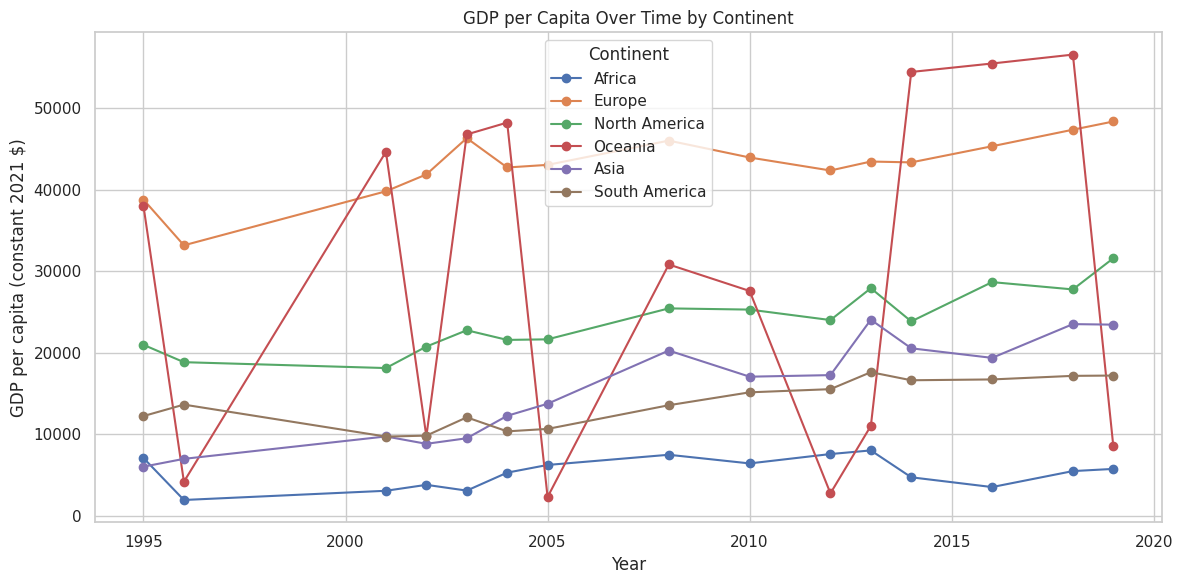

In [27]:
#Plot GDP per capita by time for each continent
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
continents = pd.read_csv("continental_averages_complete_years.csv")

# Sort by year (optional, good for line plots)
continents = continents.sort_values(by='Year')

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot GDP per capita for each continent
for continent in continents['Continent'].unique():
    subset = continents[continents['Continent'] == continent]
    plt.plot(subset['Year'], 
             subset['GDP per capita, PPP (constant 2021 international $)'],
             label=continent, marker='o')

# Labeling
plt.xlabel("Year")
plt.ylabel("GDP per capita (constant 2021 $)")
plt.title("GDP per Capita Over Time by Continent")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()


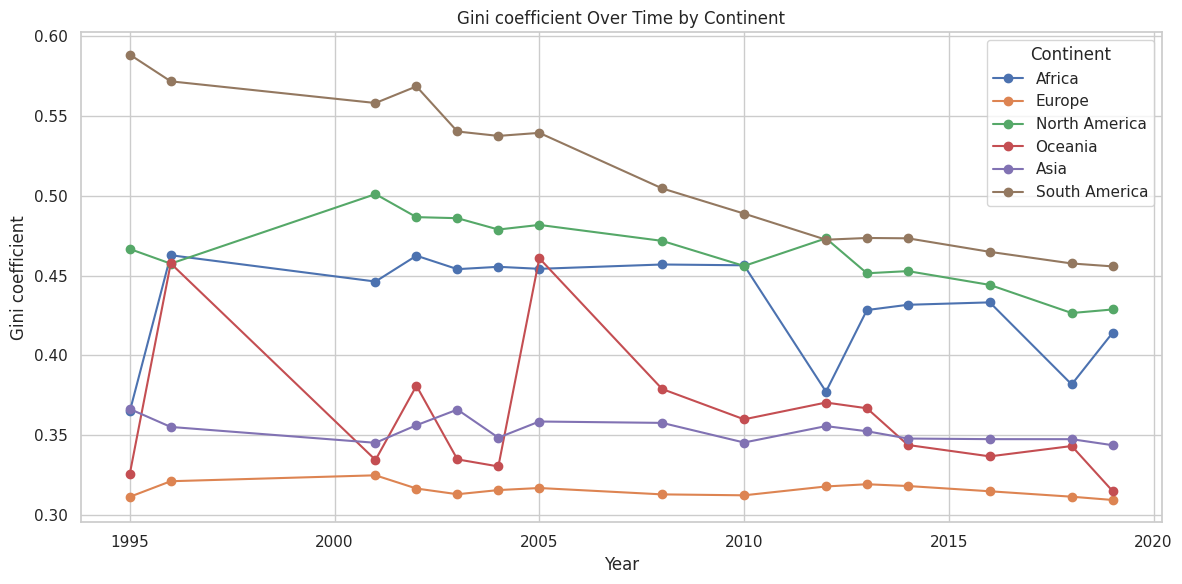

In [46]:
#Plot Gini by time for each continent
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
continents = pd.read_csv("continental_averages_complete_years.csv")

# Sort by year (optional, good for line plots)
continents = continents.sort_values(by='Year')

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot Ginifor each continent
for continent in continents['Continent'].unique():
    subset = continents[continents['Continent'] == continent]
    plt.plot(subset['Year'], 
             subset['Gini coefficient'],
             label=continent, marker='o')

# Labeling
plt.xlabel("Year")
plt.ylabel("Gini coefficient")
plt.title("Gini coefficient Over Time by Continent")
plt.legend(title="Continent")
plt.tight_layout()
plt.show()


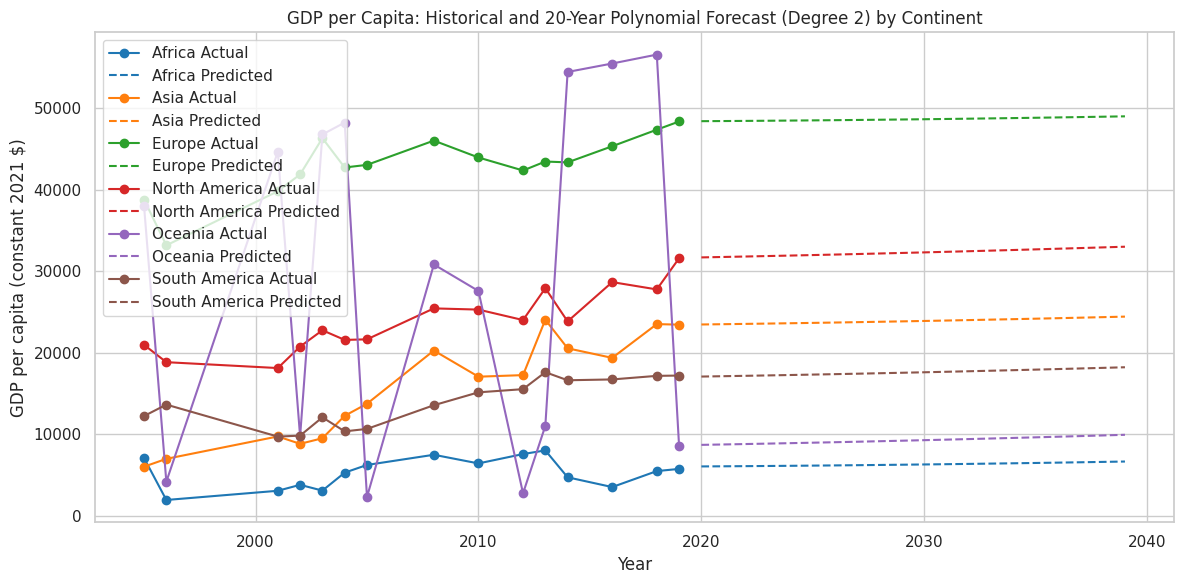

In [47]:
#Predict future GDP PPP with polynomial, and all features besides continent GDP PPP
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load data
continents = pd.read_csv("continental_averages_complete_years.csv")
continents = continents.dropna()

# Prepare training data
y = continents['GDP per capita, PPP (constant 2021 international $)']
X = continents.drop(columns=['GDP per capita, PPP (constant 2021 international $)', 'Continent'])

# Create polynomial regression pipeline
degree = 2  # 2 degree polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Forecast for 20 years
last_year = continents['Year'].max()
future_years = list(range(last_year + 1, last_year + 21))

# Generate future predictions by continent
future_rows = []
for continent in continents['Continent'].unique():
    latest_row = continents[continents['Continent'] == continent].sort_values('Year').iloc[-1].copy()
    for year in future_years:
        row = latest_row.copy()
        row['Year'] = year
        row['Continent'] = continent
        future_rows.append(row)

future_df = pd.DataFrame(future_rows)

# Prepare X for prediction
X_future = future_df.drop(columns=['GDP per capita, PPP (constant 2021 international $)', 'Continent'])
future_df['Predicted GDP'] = poly_model.predict(X_future)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Generate consistent color palette
palette = sns.color_palette("tab10", n_colors=len(continents['Continent'].unique()))
continent_colors = dict(zip(continents['Continent'].unique(), palette))

# Plot each continent's actual and predicted data
for continent in continents['Continent'].unique():
    actual = continents[continents['Continent'] == continent]
    predicted = future_df[future_df['Continent'] == continent]
    
    color = continent_colors[continent]
    
    # Actual: solid
    plt.plot(actual['Year'], actual['GDP per capita, PPP (constant 2021 international $)'],
             label=f"{continent} Actual", color=color, marker='o')
    
    # Predicted: dashed
    plt.plot(predicted['Year'], predicted['Predicted GDP'],
             label=f"{continent} Predicted", color=color, linestyle='--')

# Labels
plt.xlabel("Year")
plt.ylabel("GDP per capita (constant 2021 $)")
plt.title(f"GDP per Capita: Historical and 20-Year Polynomial Forecast (Degree {degree}) by Continent")
plt.legend()
plt.tight_layout()
plt.show()


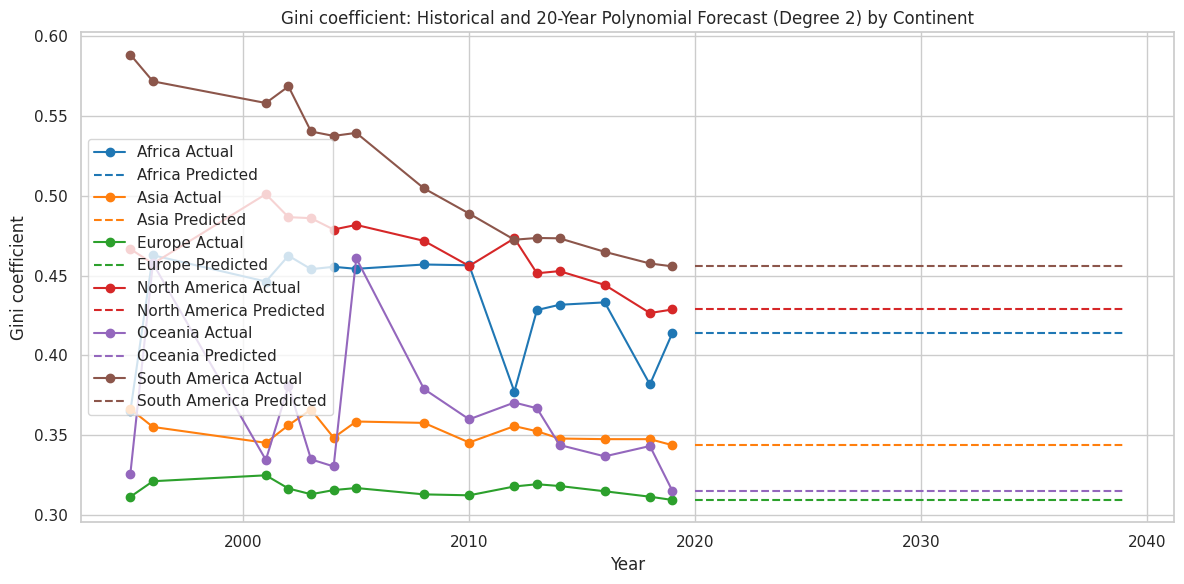

In [48]:
#Same as above for Gini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Load data
continents = pd.read_csv("continental_averages_complete_years.csv")
continents = continents.dropna()

# Prepare training data
y = continents['Gini coefficient']
X = continents.drop(columns=['Gini coefficient', 'Continent'])

# Create polynomial regression pipeline
degree = 2  # Degree 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X, y)

# Forecast for 20 years
last_year = continents['Year'].max()
future_years = list(range(last_year + 1, last_year + 21))

# Generate future predictions by continent
future_rows = []
for continent in continents['Continent'].unique():
    latest_row = continents[continents['Continent'] == continent].sort_values('Year').iloc[-1].copy()
    for year in future_years:
        row = latest_row.copy()
        row['Year'] = year
        row['Continent'] = continent
        future_rows.append(row)

future_df = pd.DataFrame(future_rows)

# Prepare X for prediction
X_future = future_df.drop(columns=['Gini coefficient', 'Continent'])
future_df['Predicted GDP'] = poly_model.predict(X_future)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Generate consistent color palette
palette = sns.color_palette("tab10", n_colors=len(continents['Continent'].unique()))
continent_colors = dict(zip(continents['Continent'].unique(), palette))

# Plot each continent's actual and predicted data
for continent in continents['Continent'].unique():
    actual = continents[continents['Continent'] == continent]
    predicted = future_df[future_df['Continent'] == continent]
    
    color = continent_colors[continent]
    
    # Actual: solid
    plt.plot(actual['Year'], actual['Gini coefficient'],
             label=f"{continent} Actual", color=color, marker='o')
    
    # Predicted: dashed
    plt.plot(predicted['Year'], predicted['Gini coefficient'],
             label=f"{continent} Predicted", color=color, linestyle='--')

# Labels
plt.xlabel("Year")
plt.ylabel("Gini coefficient")
plt.title(f"Gini coefficient: Historical and 20-Year Polynomial Forecast (Degree {degree}) by Continent")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#TESTING AREA 2
import pycountry_convert as pc

# Convert a single 3-letter country code to continent
def get_continent(country_code):
    try:
        # Convert the 3-letter country code to its corresponding continent code
        continent_code = pc.country_alpha3_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return None

# Test for a single country code (e.g., 'CAN' for Canada)
country_code = 'CAN'
continent = get_continent(country_code)
print(f"The continent for {country_code} is {continent}")


In [ ]:
#TESTING AREA 3
import pandas as pd

# Load the filtered country-level dataset
df = pd.read_csv("final_unified_data_wide_filtered.csv")

# Drop rows with missing values in key numeric columns
df_clean = df.dropna(subset=[
    "GDP per capita, PPP (constant 2021 international $)",
    "Gini coefficient",
    "Political regime",
    "Trade (% of GDP)"
])

# Group by Continent and Year and compute the mean
continental_avg = df_clean.groupby(['Continent', 'Year']).mean(numeric_only=True).reset_index()

# Save to CSV
continental_avg.to_csv("continental_averages.csv", index=False)


In [ ]:
#TESTING AREA 4

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Load dataset
final = pd.read_csv("final_unified_data_wide_filtered.csv")

# Drop irrelevant columns
final_decisionTree = final.filter([
    "GDP per capita, PPP (constant 2021 international $)",
    "Continent",
    "Gini coefficient",
    "Political regime",
    "Trade (% of GDP)",
    "Gini level"
])

# Encode categorical features
for col in ['Continent', 'Political regime']:
    final_decisionTree[col] = LabelEncoder().fit_transform(final_decisionTree[col])

# Train-test split
train = final_decisionTree.sample(frac=0.8, random_state=42)
test = final_decisionTree.drop(index=train.index)

# Define X and y
# Define X and y (excluding Gini coefficient)
y_train = train['Gini level']
X_train = train.drop(columns=['Gini level', 'Gini coefficient'])

y_test = test['Gini level']
X_test = test.drop(columns=['Gini level', 'Gini coefficient'])


# Train decision tree
T = DecisionTreeClassifier(max_depth=3, random_state=42)
T.fit(X_train, y_train)

# Evaluation
print('Score on train:', T.score(X_train, y_train))
print('Score on test:', T.score(X_test, y_test))

# Plot the tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(T, filled=True, feature_names=X_train.columns, class_names=T.classes_, ax=ax)
plt.show()


In [49]:
#Sources:
#https://ourworldindata.org/grapher/economic-inequality-gini-index
#https://ourworldindata.org/grapher/gdp-per-capita-worldbank
#https://ourworldindata.org/grapher/political-regime?time=latest
#https://ourworldindata.org/grapher/trade-as-share-of-gdp
#https://ourworldindata.org/energy
